## 英文斷詞

In [1]:
a = 'this is a book'
a.split()

['this', 'is', 'a', 'book']

## 安裝Jieba

In [3]:
! pip install jieba

  Running setup.py bdist_wheel for jieba: started
  Running setup.py bdist_wheel for jieba: finished with status 'done'
  Stored in directory: C:\Users\Student\AppData\Local\pip\Cache\wheels\ce\32\de\c2be1db5f30804bc7f146ff698c52963f8aa11ba5049811b0d
Successfully built jieba


## 使用Jieba 斷詞

In [4]:
import jieba
s = '那酸民婉君也可以報名嘛?'
for w in jieba.cut(s):
    print(w)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Student\AppData\Local\Temp\jieba.cache
Loading model cost 0.688 seconds.
Prefix dict has been built succesfully.


那酸民婉君
也
可以
報名
嘛
?


## 正規表達法斷句

In [7]:
import re
news = '全球物聯網智能系統領導廠商研華為加速歐洲市場發展，積極擴建位於荷蘭恩荷芬的歐洲服務中心，並預計於2018年1月24日正式啟用。整座建築除為智能建築外，還將成為研華歐洲的物聯網與工業4.0實境展示場地。'
re.split('，|。',news)

['全球物聯網智能系統領導廠商研華為加速歐洲市場發展',
 '積極擴建位於荷蘭恩荷芬的歐洲服務中心',
 '並預計於2018年1月24日正式啟用',
 '整座建築除為智能建築外',
 '還將成為研華歐洲的物聯網與工業4.0實境展示場地',
 '']

## 加密原理

In [138]:
secret = {}
passwd = 'abcdefghijklmnopqrstuvwxyz'
for o,n in zip(list(passwd), list(passwd[::-1])):
    #print(o,n)
    secret[o] = n 
 
print(secret)
a = 'this is a book'
b = ''.join([secret.get(w, ' ') for w in a])
print(b)
print(''.join([secret.get(w, ' ') for w in b]))


{'a': 'z', 'b': 'y', 'c': 'x', 'd': 'w', 'e': 'v', 'f': 'u', 'g': 't', 'h': 's', 'i': 'r', 'j': 'q', 'k': 'p', 'l': 'o', 'm': 'n', 'n': 'm', 'o': 'l', 'p': 'k', 'q': 'j', 'r': 'i', 's': 'h', 't': 'g', 'u': 'f', 'v': 'e', 'w': 'd', 'x': 'c', 'y': 'b', 'z': 'a'}
gsrh rh z yllp
this is a book


In [20]:
import jieba
seg_list=jieba.cut("大巨蛋案對市府同仁下封口令？柯P否認",cut_all=True)
print("Full Mode:","/ ".join(seg_list))

seg_list=jieba.cut("大巨蛋案對市府同仁下封口令？柯P否認",cut_all=False)
#print("Default Mode:","/ ".join(seg_list))

# method 1
for w in seg_list:
    print(w)
    
seg_list=jieba.cut("大巨蛋案對市府同仁下封口令？柯P否認",cut_all=False)  
"/".join(seg_list)

Full Mode: 大/ 巨蛋/ 案/ 對/ 市府/ 同仁/ 下/ 封口/ 封口令/ 口令/ / / 柯/ P/ 否/ 認
大
巨蛋
案對
市府
同仁
下
封口令
？
柯
P
否認


'大/巨蛋/案對/市府/同仁/下/封口令/？/柯/P/否認'

## Jieba 字典
- C:\ProgramData\Anaconda3\Lib\site-packages\jieba

In [28]:
jieba.load_userdict('userdict.txt')

In [29]:
import jieba


seg_list=jieba.cut("大巨蛋案對市府同仁下封口令？柯P否認",cut_all=False)
print("Default Mode:","/ ".join(seg_list))

Default Mode: 大巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 柯P/ 否認


In [30]:
import jieba.posseg as pseg
words=pseg.cut("大巨蛋案對市府同仁下封口令？柯P否認")
for w in words:
    print(w.word,w.flag)

大巨蛋 x
案 ng
對 p
市府 n
同仁 nr
下 f
封口令 n
？ x
柯P n
否認 v


In [32]:
sentence = "大巨蛋案對市府同仁下封口令？柯P否認"
words=jieba.tokenize(sentence)
for tw in words:
    print(tw[0],tw[1],tw[2])

大巨蛋 0 3
案對 3 5
市府 5 7
同仁 7 9
下 9 10
封口令 10 13
？ 13 14
柯P 14 16
否認 16 18


## jieba 繁體中文模型
- https://github.com/ldkrsi/jieba-zh_TW

## 使用Wikipedia 建立字典

In [34]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://zh.wikipedia.org/wiki/%E5%8F%B0%E7%81%A3%E7%A9%8D%E9%AB%94%E9%9B%BB%E8%B7%AF%E8%A3%BD%E9%80%A0')
soup = BeautifulSoup(res.text, 'html.parser')
soup.select('#mw-content-text p b')

[<b>台灣積體電路製造股份有限公司</b>,
 <b>台積電</b>,
 <b>台積</b>,
 <b>Taiwan Semiconductor</b>,
 <b>TSMC</b>,
 <b>台積電集團</b>]

## n-gram 切詞

In [37]:
input_sentence='那我們酸民婉君也可以報名嗎'
for i in range(len(input_sentence) - 2 + 1):
    print(input_sentence[i:i+2])

那我
我們
們酸
酸民
民婉
婉君
君也
也可
可以
以報
報名
名嗎


In [38]:
for i in range(len(input_sentence) - 3 + 1):
    print(input_sentence[i:i+3])

那我們
我們酸
們酸民
酸民婉
民婉君
婉君也
君也可
也可以
可以報
以報名
報名嗎


In [41]:
def ngram(sentence, n= 2):
    for i in range(len(sentence) - n + 1):
        print(sentence[i:i+n])
        
ngram('那我們酸民婉君也可以報名嘛?')
ngram('那我們酸民婉君也可以報名嘛?', 4)
        

那我
我們
們酸
酸民
民婉
婉君
君也
也可
可以
以報
報名
名嘛
嘛?
那我們酸
我們酸民
們酸民婉
酸民婉君
民婉君也
婉君也可
君也可以
也可以報
可以報名
以報名嘛
報名嘛?


In [49]:
def ngram(sentence, n= 2):
    for i in range(len(sentence) - n + 1):
        print(sentence[i:i+n])
        
skip_word = '?.,、「！】？：《」》～'

In [147]:
a = '234'
ary = []
for w in a:
    if w in skip_word:
        ary.append(w)
len(ary)


0

In [52]:
#for i in range(len(sentence) -n + 1):
sentence = '那我們酸民婉君也可以報名嘛?'
for i in range(len(sentence) - 2 + 1): 
    if len([word for word in sentence[i:i+2] if word in skip_word]) == 0 :
        print(sentence[i:i+2])

那我
我們
們酸
酸民
民婉
婉君
君也
也可
可以
以報
報名
名嘛


## 長詞優先法

In [57]:
news = '''《精靈寶可夢GO》在台帶起一波AR 擴增實境遊戲風潮，從去年底網路就開始謠傳，2017年第1季將推出《哈利波特GO》，如今都已到年底，連個影子都沒看到，但遊戲開發商Niantic昨(8)日正式宣布，下一款遊戲大作就是J.K. 羅琳筆下作品改編的《哈利波特：巫師同盟》
 
據了解，《哈利波特：巫師同盟》也是AR 擴增實境遊戲，玩家化身成巫師學習魔咒，在真實世界尋寶，雖然僅暫定2018年上市，尚無確切發行日期，但也許很快在路邊就能看到許多玩家拿著手機互指︰「去去，武器走」的有趣畫面。（黃韻文／綜合報導）'''

skip_word = '?.,、「！】？：《」》～，'

sentence = news

from collections import Counter
#c = Counter()
word_ary = []
for i in range(len(sentence) - 2 + 1): 
    if len([word for word in sentence[i:i+2] if word in skip_word]) == 0 :
        word_ary.append(sentence[i:i+2])
c = Counter(word_ary)
for term, freq in c.most_common(10):
    if freq >= 3:
        print(term)

遊戲
哈利
利波
波特
巫師


In [58]:
from collections import Counter
#c = Counter()
word_ary = []
for i in range(len(sentence) - 4 + 1): 
    if len([word for word in sentence[i:i+2] if word in skip_word]) == 0 :
        word_ary.append(sentence[i:i+4])
c = Counter(word_ary)
for term, freq in c.most_common(10):
    if freq >= 3:
        print(term)

哈利波特


In [67]:
import re
re.split('《|》|，|。|／|（|）|「|」|\n|：|︰|\)|\(',news)

['',
 '精靈寶可夢GO',
 '在台帶起一波AR 擴增實境遊戲風潮',
 '從去年底網路就開始謠傳',
 '2017年第1季將推出',
 '哈利波特GO',
 '',
 '如今都已到年底',
 '連個影子都沒看到',
 '但遊戲開發商Niantic昨',
 '8',
 '日正式宣布',
 '下一款遊戲大作就是J.K. 羅琳筆下作品改編的',
 '哈利波特',
 '巫師同盟',
 '',
 ' ',
 '據了解',
 '',
 '哈利波特',
 '巫師同盟',
 '也是AR 擴增實境遊戲',
 '玩家化身成巫師學習魔咒',
 '在真實世界尋寶',
 '雖然僅暫定2018年上市',
 '尚無確切發行日期',
 '但也許很快在路邊就能看到許多玩家拿著手機互指',
 '',
 '去去',
 '武器走',
 '的有趣畫面',
 '',
 '黃韻文',
 '綜合報導',
 '']

In [69]:
a = '下一款遊戲大作就是J.K. 羅琳筆下作品改編的'
a.replace('遊戲', '')

keywords = ['遊戲', '作品']
for k in keywords:
    a = a.replace(k, '')
print(a)


下一款大作就是J.K. 羅琳筆下改編的


In [102]:
def removeKey(sentence, keywords):
    for k in keywords:
        sentence = sentence.replace(k, '')
    return sentence

removeKey(a, keywords)

'下一款大作就是J.K. 羅琳筆下改編的'

In [114]:
def ngram(sentence, k = 2):
    ngrams = []
    for i in range(0, len(sentence) - k + 1):
        ngrams.append(sentence[i:i+k])
    return ngrams

In [115]:
#news
from collections import Counter
k = 4
words = []
keywords = []
for sentence in re.split('《|》|，|。|／|（|）|「|」|\n|：|︰|\)|\(',news):
    words.extend(ngram(removeKey(sentence, keywords), 4))
c = Counter(words)
for word, cnt in c.items():
    if cnt >= 3:
        keywords.append(word)

In [116]:
keywords = ['哈利波特'] 
removeKey('哈利波特GO', keywords)

'GO'

In [124]:
keywords = []
for k in range(4,1,-1):
    words = []
    for sentence in re.split('《|》|，|。|／|（|）|「|」|\n|：|︰|\)|\(',news):
        removed_sentence = removeKey(sentence, keywords)
        words.extend(ngram(removed_sentence, k))
    c = Counter(words)
    for word, cnt in c.items():
        if cnt >= 3:
            keywords.append(word)
keywords

['哈利波特', '遊戲', '巫師']

In [129]:
def removeKey(sentence, keywords):
    for k in keywords:
        sentence = sentence.replace(k, '')
    return sentence

def ngram(sentence, k = 2):
    ngrams = []
    for i in range(0, len(sentence) - k + 1):
        ngrams.append(sentence[i:i+k])
    return ngrams

def longTermFirst(news):
    delimiter = '《|》|，|。|／|（|）|「|」|\n|：|︰|\)|\(|、'
    keywords = []
    for k in range(4,1,-1):
        words = []
        for sentence in re.split(delimiter,news):
            removed_sentence = removeKey(sentence, keywords)
            words.extend(ngram(removed_sentence, k))
        c = Counter(words)
        for word, cnt in c.items():
            if cnt >= 3:
                keywords.append(word)
    return keywords

In [130]:
news = '''行政院長賴清德今主持行政院會通過《勞動基準法》修正草案，並親自召開記者會對外說明。面對今天近千人的勞團抗議有修法版本「有條件鬆綁七休一」等規定，賴揆在會上針對總統蔡英文重要政見，落實周休二日精神，這次修法有兩大重點，四不變、四彈性，來保障勞工權益和企業經營的彈性。
 
賴清德說，這次修法兩大重點，第一四個不變：保障勞工權益正常工時不變、周休二日不變、加班總工時不變、加班費率不變，來捍衛勞工權益；同時賦予企業經營的彈性，四個彈性：加班彈性、排班彈性、輪班間隔彈性、特休運用彈性。

賴清德最後強調，拚經濟不分黨派，呼籲朝野共同承擔；也希望勞資雙方不要各站在極端，理性客觀看待這次修法內容、不要對立，大家攜手合作，共推經濟的發展，當然也要敬請國人給行政院支持，讓修法可以順利，推動經濟可以發展成功。（陳雅芃／台北報導）'''

longTermFirst(news)

['這次修法', '勞工權益', '行政院', '賴清德', '不變', '彈性', '加班', '經濟']

In [135]:
a = ['1', '2', '3']
''.join(a)
'$'.join(a)
'/'.join(a)
''.join(a)
' '.join(a)

'1 2 3'

## 文字雲

In [148]:
news = '''
美國威斯康辛州主管投資審查的威斯康辛經濟開發廳（WEDC），周三敲定鴻海（2317）在當地設面板廠所提供30億美元（約906億元台幣）獎勵方案的合約內容，取得董事長郭台銘個人擔保，若未能達到投資與就業目標，WEDC將要求歸還獎勵，而鴻海將負擔當中75%款項，其餘25%由郭董及他名下SIO國際控股公司負擔。

郭台銘和威州州長華克（Scott Walker）將在當地時間周五下午（台灣時間周六凌晨），在美國眾議院議長萊恩的陪同下，簽署共29頁的合約。

根據WEDC表決通過的合約內容，鴻海必須投資90億美元（約2717億元台幣），並聘用1.3萬人，才能拿到全部28.5億美元現金獎勵，另提供上限為1.5億美元的建築設備消費稅豁免。
 
合約內容還包括鴻海須逐年達到就業門檻，才能拿到補助。明年至少要聘用260人，2022年聘用人數至少要有5200人，2027年至少要有1.04萬人。

而且，鴻海所付員工年薪須介於3萬至10萬美元，平均年薪須有5.3875萬美元（約163萬元台幣），才能拿到補助。（于倩若／綜合外電報導）
'''

In [170]:
import jieba
jieba.load_userdict('userdict.txt')
words = []
for w in jieba.cut(news):
    words.append(w)

In [172]:
from collections import Counter
import re
c = Counter(words)
for word, cnt in c.most_common(30):
    m = re.match('[\u4e00-\u9fa5]+', word)
    if m and len(word) >= 2:
        print(word, cnt)

美元 6
鴻海 5
合約 4
投資 3
台幣 3
聘用 3
才能 3
拿到 3
至少 3
美國 2
威斯康辛 2
提供 2
億元 2
獎勵 2
內容 2
郭台銘 2
達到 2


In [185]:
news = '''
《工商時報》今日報導，日盛金大股東新生銀求售日盛金股權，並在價格及出售模式都有軟化的誠意，日盛金總經理王芝芳表示，「毫無所悉」。

日盛金有兩大外資股東，分別為日本的新生銀，及香港的建高，《工商時報》報導，新生銀近期接觸彰銀，由彰銀董事長張明道評估，雙方透過管道展開接觸。

《工商時報》報導，彰銀希望能以「換股合併」或是「一半現金、一半換股」的方式進行，由於日盛金目前股價低於淨值，若採100％換股進行，彰銀購併日盛金後，泛公股的股權將提升至接近34％，持有22.5％彰銀股權的台新金持股比將降至18％。（王立德／台北報導）
'''

In [186]:
import jieba
jieba.load_userdict('userdict.txt')
words = []
for w in jieba.cut(news):
    words.append(w)

In [187]:
from collections import Counter
import re
c = Counter(words)
for word, cnt in c.most_common(100):
    m = re.match('[\u4e00-\u9fa5]+', word)
    if m and len(word) >= 2:
        print(word, cnt)

日盛金 6
彰銀 5
報導 4
工商 3
時報 3
新生 3
換股 3
股權 2
接觸 2
一半 2
進行 2
今日 1
大股東 1
求售 1
並在 1
價格及 1
出售 1
模式 1
軟化 1
誠意 1
總經理 1
王芝芳 1
表示 1
毫無所悉 1
兩大 1
外資 1
股東 1
分別 1
日本 1
香港 1
建高 1
近期 1
董事 1
張明道 1
評估 1
雙方 1
透過 1
管道 1
展開 1
希望 1
能以 1
或是 1
現金 1
方式 1
目前 1
股價 1
淨值 1
若採 1
公股 1
股權將 1
提升 1
接近 1
持有 1
新金 1
持股 1
比將 1
降至 1
立德 1
台北 1


## 找出關鍵字 (TF-IDF)

In [195]:
import scipy as sp
a,abb,abc=["a"],["a","b","b"],["a","b","c"]
D=[a,abb,abc]

#tfidf('a', a, D)
tf = 1 / 1
idf = sp.log(3/3)
print(tf, idf, tf * idf)


#tfidf('a', abb, D)
tf = 1 / 3
idf = sp.log(3/3)
print(tf, idf, tf * idf)

#tfidf('b', abb, D)
tf  = 2/3
idf = sp.log(3/2)
print(tf, idf, tf * idf)


#tfidf('a', abc, D)
tf  = 1/3
idf = sp.log(3/3)
print(tf, idf, tf * idf)

#tfidf('b', abc, D)
tf  = 1/3
idf = sp.log(3/2)
print(tf, idf, tf * idf)

#tfidf('c', abc, D)
tf  = 1/3
idf = sp.log(3/1)
print(tf, idf, tf * idf)

1.0 0.0 0.0
0.3333333333333333 0.0 0.0
0.6666666666666666 0.405465108108 0.270310072072
0.3333333333333333 0.0 0.0
0.3333333333333333 0.405465108108 0.135155036036
0.3333333333333333 1.09861228867 0.366204096223


In [196]:
a,abb,abc=["a"],["a","b","b"],["a","b","c"]
D=[a,abb,abc]

def tfidf(term, doc, Documents):
    tf  = doc.count(term) / len(doc)
    idf = sp.log(len(Documents) / len([d for d in Documents if term in d]))
    return tf * idf

In [202]:
print(tfidf('a', a, D))
print(tfidf('a', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abb, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

0.0
0.0
0.0
0.270310072072
0.135155036036
0.366204096223


In [204]:
news

'\n《工商時報》今日報導，日盛金大股東新生銀求售日盛金股權，並在價格及出售模式都有軟化的誠意，日盛金總經理王芝芳表示，「毫無所悉」。\n\n日盛金有兩大外資股東，分別為日本的新生銀，及香港的建高，《工商時報》報導，新生銀近期接觸彰銀，由彰銀董事長張明道評估，雙方透過管道展開接觸。\n\n《工商時報》報導，彰銀希望能以「換股合併」或是「一半現金、一半換股」的方式進行，由於日盛金目前股價低於淨值，若採100％換股進行，彰銀購併日盛金後，泛公股的股權將提升至接近34％，持有22.5％彰銀股權的台新金持股比將降至18％。（王立德／台北報導）\n'

In [206]:
import jieba.analyse 
tags=jieba.analyse.extract_tags(news,5)
print(",".join(tags))

日盛金,彰銀,報導,時報,換股


## 詞頻矩陣

In [ ]:
s  ="大巨蛋案對市府同仁下封口令？柯P否認"
s1 ="柯P市府近來飽受大巨蛋爭議"

In [222]:
import jieba 

jieba.load_userdict('userdict.txt')
ary=['【更新】柯P：洪智坤洩漏公文案還沒看到公文 今處理',
     '留洪智坤柯：殘障求職不易',
     '人事處議處洪智坤 柯P：不清楚議處結果']

corpus=[]
for title in ary:
    corpus.append(' '.join(jieba.cut(title)))

In [223]:
corpus

['【 更新 】 柯P ： 洪智坤 洩漏 公文 案還 沒 看到 公文   今處理',
 '留 洪智坤 柯 ： 殘障 求職 不易',
 '人事 處議 處 洪智坤   柯P ： 不 清楚 議處 結果']

In [224]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(corpus)
word=vectorizer.get_feature_names()

In [225]:
X

<3x16 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [226]:
print(vectorizer.get_feature_names())

['不易', '人事', '今處理', '公文', '更新', '柯p', '案還', '殘障', '求職', '洩漏', '洪智坤', '清楚', '看到', '結果', '處議', '議處']


In [227]:
X.toarray()

array([[0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]], dtype=int64)

In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(corpus)
word=vectorizer.get_feature_names()

In [231]:
print(vectorizer.get_feature_names())
X.toarray()

['不易', '人事', '今處理', '公文', '更新', '柯p', '案還', '殘障', '求職', '洩漏', '洪智坤', '清楚', '看到', '結果', '處議', '議處']


array([[ 0.        ,  0.        ,  0.31738473,  0.63476946,  0.31738473,
         0.24137927,  0.31738473,  0.        ,  0.        ,  0.31738473,
         0.18745253,  0.        ,  0.31738473,  0.        ,  0.        ,
         0.        ],
       [ 0.54645401,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.54645401,  0.54645401,  0.        ,
         0.32274454,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.41074684,  0.        ,  0.        ,  0.        ,
         0.31238356,  0.        ,  0.        ,  0.        ,  0.        ,
         0.2425937 ,  0.41074684,  0.        ,  0.41074684,  0.41074684,
         0.41074684]])

## 計算相似度

In [238]:
import numpy as np
import math
  # 柯 巨 遠 .. .. . . .. .. ..
a = [1,1,1,0,0,0,0,0,0,0,0,0,0]
b = [1,1,1,1,1,1,1,1,1,1,1,1,1]

na = np.array(a)
nb = np.array(b)

math.sqrt(sum((na - nb) ** 2))

3.1622776601683795

In [242]:
a = [1, 2, 2, 1, 1, 1, 0]
b = [1, 2, 2, 1, 1, 2, 1]

na = np.array(a)
nb = np.array(b)

sum(na * nb) / (math.sqrt(sum(na ** 2)) * math.sqrt(sum(nb ** 2)))

0.93819418743314187

In [243]:
import jieba 

jieba.load_userdict('userdict.txt')
ary=['【更新】柯P：洪智坤洩漏公文案還沒看到公文 今處理',
     '留洪智坤柯：殘障求職不易',
     '人事處議處洪智坤 柯P：不清楚議處結果']

corpus=[]
for title in ary:
    corpus.append(' '.join(jieba.cut(title)))

In [244]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(corpus)
word=vectorizer.get_feature_names()

In [247]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(X)

In [248]:
cs

array([[ 1.        ,  0.15075567,  0.22792115],
       [ 0.15075567,  1.        ,  0.18898224],
       [ 0.22792115,  0.18898224,  1.        ]])

## 凱基信用卡問答

In [261]:
import requests
from bs4 import BeautifulSoup
qa_dic = {}
for page in range(1,8):
    res = requests.get('https://www.kgibank.com/T04/T0407/T040704/T04070401/T04070401.jsp?sel={}'.format(page))
    soup = BeautifulSoup(res.text, 'html.parser')
    questions = [ele.text.strip() for ele in soup.select('.list_02')]
    answers = [ele.text.strip() for ele in soup.select('.text_01')]
    qa_dic.update(dict(zip(questions,answers)))

In [296]:
import jieba
jieba.load_userdict('userdict.txt')
corpus = []
questions = []
q = '我的信用卡遺失了 該如何補發新卡'
corpus.append(' '.join([ele for ele in jieba.cut(q)]))
for question in qa_dic:
    #print(question)
    corpus.append(' '.join([ele for ele in jieba.cut(question)]))
    questions.append(question)

In [298]:
#corpus

In [299]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(corpus)
word=vectorizer.get_feature_names()

In [300]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(X[0],X[1:])

In [301]:
rank = cs[0].argsort()[::-1]
rank

array([28, 24, 35,  0,  2, 29, 13, 36, 21,  3, 23, 17, 19, 30, 31,  9, 12,
       37, 43, 42, 16, 47, 32, 14,  5, 40, 15, 10, 44, 48, 38, 45,  8,  1,
       41, 39,  4,  6,  7, 18, 20, 34, 11, 33, 46, 27, 26, 25, 22], dtype=int64)

In [304]:
import numpy as np
nq = np.array(questions)
for e in rank[0:1]:
    print(questions[e], qa_dic.get(questions[e]), cs[0][e])

掛失後如何補發新卡？ 當本人完成電話掛失後，本行將立即為您補製新卡，補發之新卡約6個工作日，以掛號方式寄到您的帳單地址。 0.67082039325


## 文章分群

In [306]:
import pandas
df  = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/pyfintech/master/data/creditcard.csv', index_col=0)
df.head()

,id,url,author,title,content,board,date
0,1162260,https://www.ptt.cc/bbs/creditcard/M.1441038123...,s912912,[問題] 玉山icash卡(JCB)刷卡匯率疑問,這是我最近收到的帳單\n\n上面列出JCB匯率.但小弟我怎麼算都感覺對不太起來\nhttp:...,creditcard,2015-09-01 00:21:59+00
1,1162271,https://www.ptt.cc/bbs/creditcard/M.1441057718...,gn01819359,[問題] 關於信用分數,手上有一張額度八萬的卡\n\n三個月前的某一天把它刷到見底\n\n帳單寄來每個月最低應繳金額...,creditcard,2015-09-01 05:48:35+00
2,1162277,https://www.ptt.cc/bbs/creditcard/M.1441268701...,ohyouareapig,[心得] 元大鑽金臨時調額未過,[職業]:資訊\n\n[年齡]:36\n\n[年資]:9年\n\n[年收]:200M+\n\...,creditcard,2015-09-03 16:24:58+00
3,1162279,https://www.ptt.cc/bbs/creditcard/M.1441205579...,guianyinma,[心得] 元大鑽金卡 核卡,[職業]醫療\n\n\n[年資] 1年半\n\n\n[年收] 550k\n\n\n[檢附財力...,creditcard,2015-09-02 22:52:55+00
4,1162291,https://www.ptt.cc/bbs/creditcard/M.1441327765...,imrt,Re: [新聞] 全家繳帳單也能刷卡 台新首創再送刷卡金,昨天繳電信費十分順利，\n\n今天繳學雜費就不行了。\n\n不同一組員工，\n\n一直鬼打牆...,creditcard,2015-09-04 08:49:23+00


In [316]:
filter_df = df[df['title'].str.contains('花旗') & df['title'].str.contains('問題')]

In [321]:
import jieba
corpus = []
titles = []
for ele in filter_df.iterrows():
    corpus.append(' '.join(jieba.cut(ele[1].content)))
    titles.append(ele[1].title)
    #print(ele[1].title, ele[1].content)
#filter_df

In [323]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [325]:
X

<63x1763 sparse matrix of type '<class 'numpy.int64'>'
	with 3353 stored elements in Compressed Sparse Row format>

In [326]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(X.toarray())

### KMeans 分群

In [360]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters= 8)
k_data = clf.fit_predict(cs)

In [364]:
import numpy as np
n_titles = np.array(titles)

for ele in n_titles[k_data == 5]:
    print(ele)

[問題] 花旗超級紅利卡代扣公用事業有無回饋？
[問題] 花旗活動指定電信分期最高400回饋
[問題] 花旗生活家商店繳費
[問題] 花旗prestige
[問題] Y購刷花旗的活動
[問題] 花旗卡繳納水電費
[問題] 請問花旗送的1萬點大概可換到哪裡的機票


In [368]:
from sklearn import metrics
#for k in range(2,10):
sil=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    y_kmeans=kmeans.fit_predict(cs)
    sil.append(metrics.silhouette_score(cs,y_kmeans))

In [369]:
sil

[0.053732653001443802,
 0.048525976046162426,
 0.034517338856033031,
 0.043728373486277075,
 0.026215789109033799,
 0.032614006527016612,
 0.03664781216539699,
 0.039828392877663023,
 0.032178335506157625]

### Community Detection

In [378]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

In [384]:
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity

graph = nx.Graph()

for i in range(0, len(titles)):
    cosine_similarities = cosine_similarity(tfidf[i],tfidf).flatten()
    related_docs_indices = cosine_similarities.argsort()[::-1]
    for doc in related_docs_indices[1:]:
        if cosine_similarities[doc] >= 0.1:
            graph.add_edge(titles[doc], titles[i])

Populating the interactive namespace from numpy and matplotlib


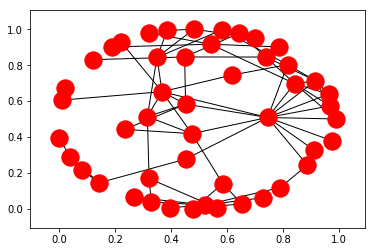

In [404]:
%pylab inline
nx.draw_networkx(graph,with_labels=False)


In [385]:
! pip install python-louvain

In [386]:
import community
partition =community.best_partition(graph)

In [400]:
for article in partition:
    if partition[article] == 7:
        print(article)

[問題] 預約申請花旗寰旅世界卡漏接？
[問題] 花旗超級紅利回饋_網路及通話費
[問題] 花旗刷卡後請款的速度
[問題] 請問花旗寰旅世界卡的等級?
